#Import libraries and read input data

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# read data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Understanding Data

In [77]:
# Exploratory data analysis
train.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

Text(0, 0.5, 'Count')

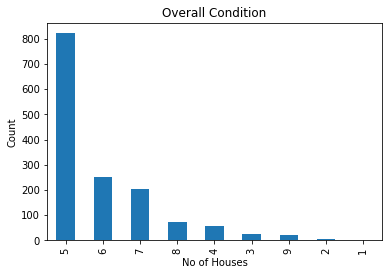

In [82]:
# check which attribute makes it easier
train['OverallCond'].value_counts().plot(kind = 'bar')
plt.title('Overall Condition')
plt.xlabel('No of Houses')
plt.ylabel('Count')

Text(0.5, 1.0, 'Price for Lot Area')

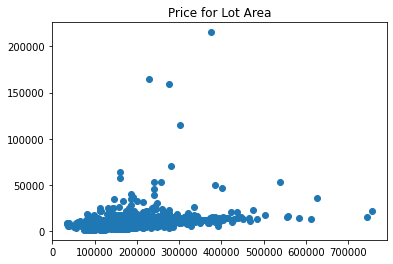

In [84]:
# How common factors are affecting the prices of Houses
plt.scatter(train.SalePrice, train.LotArea)
plt.title('Price for Lot Area')
# most of the prices seem to be in the range of 100000 to 500000 

Text(0.5, 1.0, 'Price in lot shape')

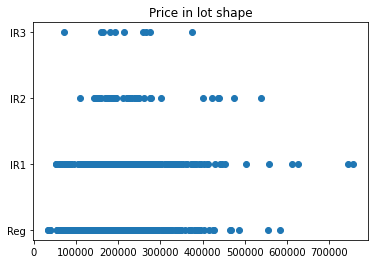

In [85]:
# How common factors are affecting the prices of Houses
plt.scatter(train.SalePrice, train.LotShape)
plt.title('Price in lot shape')

In [87]:
# How other variables are correlating with our target variable
corr_matrix = train.corr()
corr_matrix['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

#Data Preprocessing

In [71]:
# dropping rows which contains na values
train.dropna(axis=1,inplace=True)
test.dropna(axis=1,inplace=True)
# train.dropna(subset=['SalePrice'],inplace=True)

# dropping columns which has str as values
x_train= train.drop(['SalePrice','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','SaleType','SaleCondition','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','Heating','HeatingQC','CentralAir','KitchenQual','Functional','PavedDrive','YrSold','Id', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath','GarageCars', 'GarageArea','Street'],axis=1)
x_test=test.drop(['Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1' ,'Condition2','BldgType','HouseStyle','SaleCondition','RoofStyle','RoofMatl','ExterQual','ExterCond','Foundation','Heating','HeatingQC', 'CentralAir','PavedDrive','YrSold','Id','Electrical'],axis=1)
y_train = train['SalePrice']
print(x_train.columns.shape)
print(x_test.columns.shape)
print(x_test.head(5))

(24,)
(24,)
   MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0          20    11622            5            6       1961          1961       896         0             0        896         1         0             2             1             5           0   
1          20    14267            6            6       1958          1958      1329         0             0       1329         1         1             3             1             6           0   
2          60    13830            5            5       1997          1998       928       701             0       1629         2         1             3             1             6           1   
3          60     9978            6            6       1998          1998       926       678             0       1604         2         1             3             1             7           1   
4       

# PCA

In [72]:
# Using PCA: is an unsupervised statistical technique used to examine the interrelations among a set of variables
# decomposing each row into 10 principal components

def pca_dec(data, n):
  pca = PCA(n)
  X_dec = pca.fit_transform(data)
  return X_dec, pca

#Decomposing the train set:
pca_train_results, pca_train = pca_dec(x_train, 10)

#Decomposing the test set:
pca_test_results, pca_test = pca_dec(x_test, 10)

#Creating a table with the explained variance ratio
names_pcas = [f"PCA Component {i}" for i in range(1, 11, 1)]
score1 = pd.DataFrame(list(zip(names_pcas, pca_train.explained_variance_ratio_)), columns=["Component", "Explained Variance Ratio"])
print(score1)

          Component  Explained Variance Ratio
0   PCA Component 1                  0.991413
1   PCA Component 2                  0.003934
2   PCA Component 3                  0.002454
3   PCA Component 4                  0.001868
4   PCA Component 5                  0.000145
5   PCA Component 6                  0.000044
6   PCA Component 7                  0.000035
7   PCA Component 8                  0.000031
8   PCA Component 9                  0.000029
9  PCA Component 10                  0.000016


In [73]:

#Sorting the values of the first principal component by how large each one is
def var_nm_pca(x_train, pca_train):
  df = pd.DataFrame({'PCA':pca_train.components_[0], 'Variable Names':list(x_train.columns)})
  df = df.sort_values('PCA', ascending=False)

  #Sorting the absolute values of the first principal component by magnitude
  df2 = pd.DataFrame(df)
  df2['PCA']=df2['PCA'].apply(np.absolute)
  df2 = df2.sort_values('PCA', ascending=False)
  #print(df2['Variable Names'][0:11])
  return df.head(10)
# df.head()
# print variable names for pca
list_col1 = var_nm_pca(x_train, pca_train)['Variable Names'].tolist()
list_col1


['LotArea',
 'GrLivArea',
 '1stFlrSF',
 '2ndFlrSF',
 'WoodDeckSF',
 'MiscVal',
 'OpenPorchSF',
 'PoolArea',
 'ScreenPorch',
 '3SsnPorch']

In [74]:
# The PCA for LotArea is very high and it is diminishing all the other variables
# so we place the LotArea variable aside for next PCA calculation for getting relevant correlations for other variables
x_train1 = x_train.drop(['LotArea'], axis =1)
#Decomposing the train set:
pca_train_results1, pca_train1 = pca_dec(x_train1, 10)

#Decomposing the test set:
# pca_test_results1, pca_test1 = pca_dec(test_x, 10)

#Creating a table with the explained variance ratio
names_pcas1 = [f"PCA Component {i}" for i in range(1, 11, 1)]
score = pd.DataFrame(list(zip(names_pcas1, pca_train1.explained_variance_ratio_)), columns=["Component", "Explained Variance Ratio"])
print(score)


          Component  Explained Variance Ratio
0   PCA Component 1                  0.466975
1   PCA Component 2                  0.275028
2   PCA Component 3                  0.220680
3   PCA Component 4                  0.016335
4   PCA Component 5                  0.004910
5   PCA Component 6                  0.003873
6   PCA Component 7                  0.003530
7   PCA Component 8                  0.003204
8   PCA Component 9                  0.001754
9  PCA Component 10                  0.001687


In [75]:
# print variable names for pca
list_col2 = var_nm_pca(x_train1, pca_train1)['Variable Names'].tolist()
list_col2


['GrLivArea',
 '2ndFlrSF',
 '1stFlrSF',
 'WoodDeckSF',
 'OpenPorchSF',
 'PoolArea',
 'YearRemodAdd',
 'YearBuilt',
 'ScreenPorch',
 'LowQualFinSF']

# Training the model using Linear Regression and predicting the housing saleprice

In [76]:
# picking only 10 variables which has a better correlation with target variable
x_train = x_train[['LotArea','GrLivArea','2ndFlrSF','1stFlrSF','WoodDeckSF','OpenPorchSF','PoolArea','YearRemodAdd','YearBuilt','ScreenPorch', 'OverallCond']]
x_test = x_test[['LotArea','GrLivArea','2ndFlrSF','1stFlrSF','WoodDeckSF','OpenPorchSF','PoolArea','YearRemodAdd','YearBuilt','ScreenPorch','OverallCond' ]] 
model = LinearRegression()
model.fit(x_train,y_train)
predictions=model.predict(x_test)
submission=pd.DataFrame({'Id':test['Id'],'SalePrice':predictions})
filename = 'HousePrice.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: HousePrice.csv
